#  Retail Sales Prediction using Machine Learning

## 📌 Objective
To predict retail store sales using historical data, including store types, promotions, holidays, and other relevant features. This project aims to help businesses forecast future sales more accurately.

---

##  Models Trained
| Model              | R² Score | RMSE     | MAE     |
|-------------------|----------|----------|---------|
| Linear Regression | 0.0900   | 21824.98 | 14564.77 |
| Decision Tree     | 0.9640   | 7152.62  | 4954.30 |
| Random Forest     | 0.0866   | 21824.98 | 14564.77 |
| **XGBoost**       | **0.9035** | **7094.16** | **4019.50** |

 **Best Performing Model**: XGBoost

---

## 🛠 Tools Used
- Python, Pandas, Numpy
- Scikit-learn, XGBoost
- Matplotlib, Seaborn
- Google Colab

---

##  Key Takeaways
- XGBoost gave the highest R² score of **0.9035**, making it the best model.
- Decision Tree performed slightly better in R² but XGBoost had lower RMSE/MAE.
- Sales prediction models can help retailers with planning, inventory, and profit optimization.

---





# **Retail Sales Prediction using Machine Learning**

This project predicts retail sales using various regression models.  
The goal is to help businesses forecast revenue using historical data.

 **Tools Used: Python, Pandas, Scikit-learn, XGBoost, Google Colab  
 Project Type: Supervised Regression | Industry Use-case: Retail Analytics**



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [4]:
train=pd.read_csv('train.csv')
stores=pd.read_csv('stores.csv')
features=pd.read_csv("features.csv")

In [5]:
print("train Data:")
print(train.head(),"/n")

print("features Data:")
print(features.head(),"/n")

print("stores Data:")
print(stores.head(),"/n")

train Data:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False /n
features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        

In [6]:
print("Missing values in train Data:")
print(train.isnull().sum(),"/n")

print("Missing values in features Data:")
print(features.isnull().sum(),"/n")

print("Missing values in stores Data:")
print(stores.isnull().sum(),"/n")

Missing values in train Data:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 /n
Missing values in features Data:
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 /n
Missing values in stores Data:
Store    0
Type     0
Size     0
dtype: int64 /n


In [7]:
merged_df=pd.merge(train,features,on=['Store','Date'],how='left')
merged_df=pd.merge(merged_df,stores,on='Store',how='left')

print("Mergeed Datasets:\n",merged_df.head())

Mergeed Datasets:
    Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.242170  

In [8]:
print("Missing values in merged data:\n",merged_df.isnull().sum())

Missing values in merged data:
 Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [9]:
markdown_cols=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
merged_df[markdown_cols]=merged_df[markdown_cols].fillna(0)

In [10]:
merged_df['CPI']=merged_df['CPI'].fillna(merged_df['CPI'].mean())
merged_df['Unemployment']=merged_df['Unemployment'].fillna(merged_df['Unemployment'].mean())

In [11]:
print("Any missing values left in the data?",merged_df.isnull().sum())

Any missing values left in the data? Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


In [12]:
print("cleaned dataset:",merged_df.head())

cleaned dataset:    Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.548        0.0        0.0        0.0        0.0        0.0   
2       2.514        0.0        0.0        0.0        0.0        0.0   
3       2.561        0.0        0.0        0.0        0.0        0.0   
4       2.625        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.242170    

In [13]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


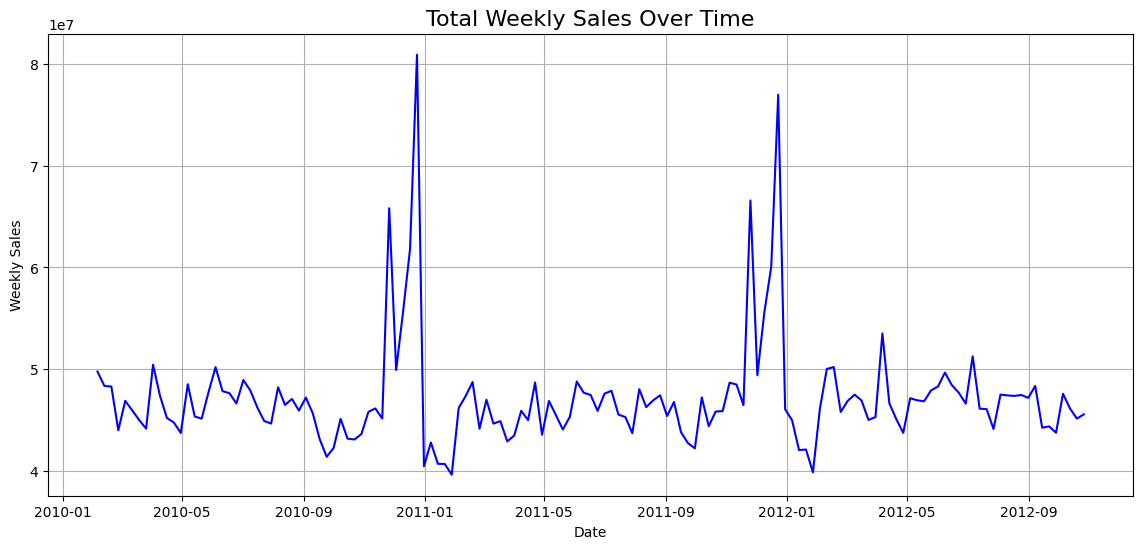

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

plt.figure(figsize=(14,6))
plt.plot(merged_df.groupby('Date')['Weekly_Sales'].sum(), color='blue')
plt.title("Total Weekly Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()

/tmp/ipython-input-15-4286828814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=holiday_sales, palette='viridis')


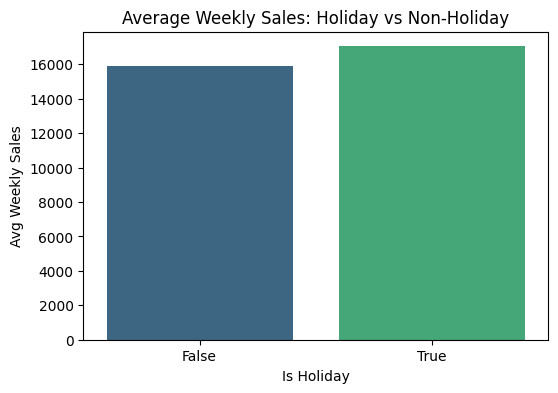

In [15]:
holiday_sales = merged_df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=holiday_sales, palette='viridis')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Avg Weekly Sales')
plt.show()

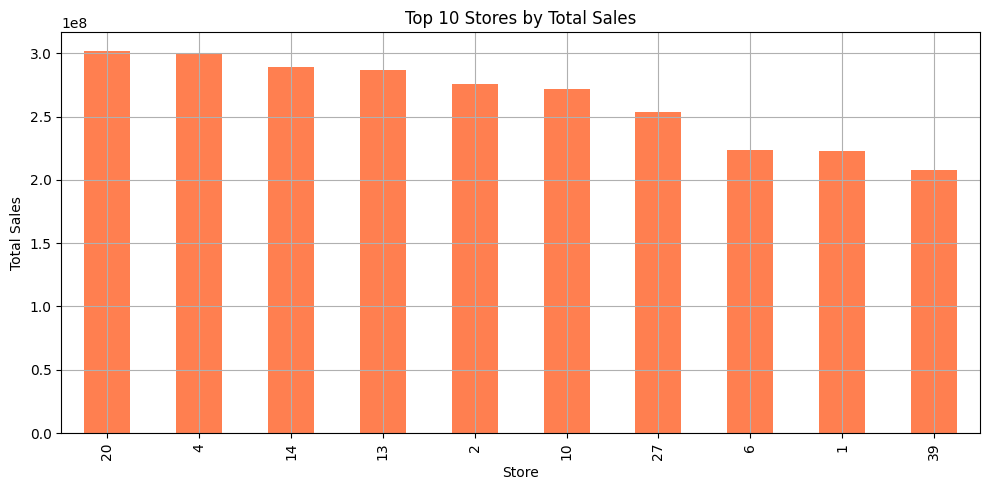

In [16]:
top_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_stores.plot(kind='bar', color='coral')
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


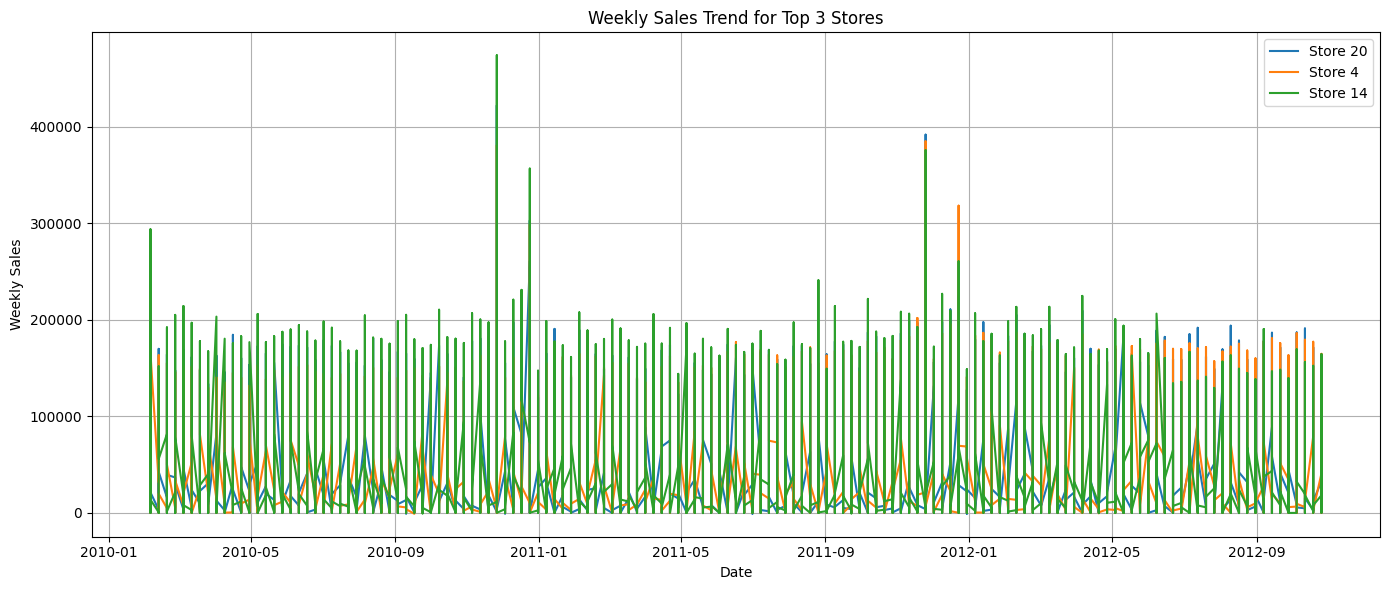

In [17]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
top_3_stores = merged_df.groupby('Store')['Weekly_Sales'].sum().nlargest(3).index
top3_df = merged_df[merged_df['Store'].isin(top_3_stores)]
plt.figure(figsize=(14, 6))
for store in top_3_stores:
    store_data = top3_df[top3_df['Store'] == store]
    store_data = store_data.sort_values('Date')
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], label=f'Store {store}')

plt.title('Weekly Sales Trend for Top 3 Stores')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


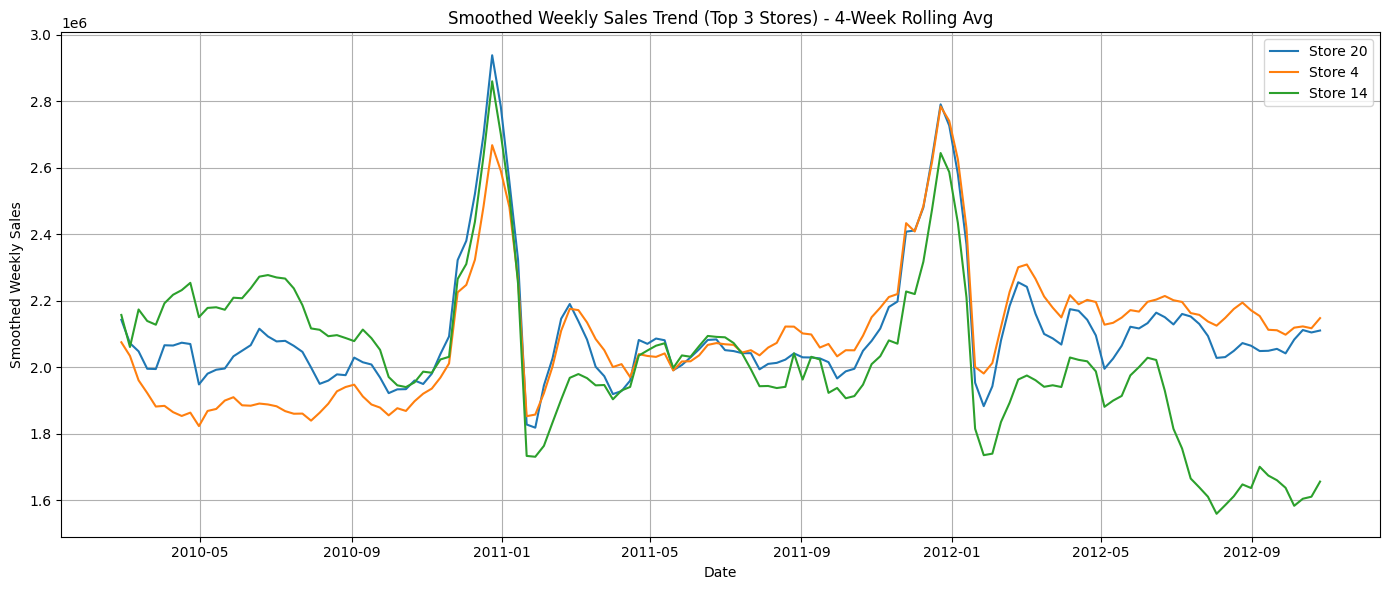

In [18]:
rolling_window = 4


weekly_sales = merged_df.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))

for store_id in top_3_stores:
    store_data = weekly_sales[weekly_sales['Store'] == store_id]
    store_data = store_data.set_index('Date')
    store_data['Smoothed_Sales'] = store_data['Weekly_Sales'].rolling(window=rolling_window).mean()
    plt.plot(store_data.index, store_data['Smoothed_Sales'], label=f'Store {store_id}')

plt.title(f'Smoothed Weekly Sales Trend (Top 3 Stores) - {rolling_window}-Week Rolling Avg')
plt.xlabel('Date')
plt.ylabel('Smoothed Weekly Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Week'] = merged_df['Date'].dt.isocalendar().week
merged_df['Day'] = merged_df['Date'].dt.day
merged_df['DayOfWeek'] = merged_df['Date'].dt.dayofweek

merged_df['Store_ID'] = merged_df['Store']

merged_df['IsPromo'] = merged_df['IsHoliday_x'].fillna(0).astype(int)

merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,IsHoliday_y,Type,Size,Year,Month,Week,Day,DayOfWeek,Store_ID,IsPromo
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,False,A,151315,2010,2,5,5,4,1,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,True,A,151315,2010,2,6,12,4,1,1
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,False,A,151315,2010,2,7,19,4,1,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,False,A,151315,2010,2,8,26,4,1,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,False,A,151315,2010,3,9,5,4,1,0


In [20]:
# Convert 'Type' column to one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=['Type'], prefix='Type', dummy_na=False)

features = ['Store_ID', 'Dept', 'Year', 'Month', 'Week', 'Day', 'DayOfWeek',
            'Temperature', 'Fuel_Price', 'IsPromo', 'Size', 'Type_A', 'Type_B', 'Type_C']
target = 'Weekly_Sales'

X = merged_df[features]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Store_ID,Dept,Year,Month,Week,Day,DayOfWeek,Temperature,Fuel_Price,IsPromo,Size,Type_A,Type_B,Type_C
138466,15,3,2011,4,13,1,4,30.34,3.811,0,123737,False,True,False
289214,30,25,2010,6,23,11,4,83.51,2.668,0,42988,False,False,True
52351,6,27,2010,6,22,4,4,79.44,2.705,0,202505,True,False,False
203504,21,49,2011,12,48,2,4,48.72,3.172,0,140167,False,True,False
233606,24,55,2012,1,1,6,4,32.86,3.585,0,203819,True,False,False


## Model Building and Evaluation

To predict retail sales, we experimented with the following regression models:

1. Linear Regression  
2. Decision Tree Regressor  
3. Random Forest Regressor  
4. XGBoost Regressor  (Best Performance)

We evaluated each model based on:
- **R² Score** (how well the model fits the data)
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**


In [22]:
# Define example values for the variables
temperature = 60.0
fuel_price = 3.5
store_type = 'A'


input_data = pd.DataFrame([{
    'Store_ID': 1,
    'Dept': 1,
    'Year': 2012,
    'Month': 12,
    'Week': 50,
    'Day': 15,
    'DayOfWeek': 6,
    'Temperature': temperature,
    'Fuel_Price': fuel_price,
    'IsPromo': 0,
    'Size': 151315,
    'Type_A': 1 if store_type == 'A' else 0,
    'Type_B': 1 if store_type == 'B' else 0,
    'Type_C': 1 if store_type == 'C' else 0
}])

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("linear regression results:")
print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")


linear regression results:
Linear Regression MSE: 474465841.17
Linear Regression R² Score: 0.09


In [24]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Regression Results:")
print(f"MSE: {dt_mse:.2f}")
print(f"R² Score: {dt_r2:.2f}")

Decision Tree Regression Results:
MSE: 19756494.74
R² Score: 0.96


In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regression Results:")
print(f"MSE: {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Regression Results:
MSE: 11473658.97
R² Score: 0.98


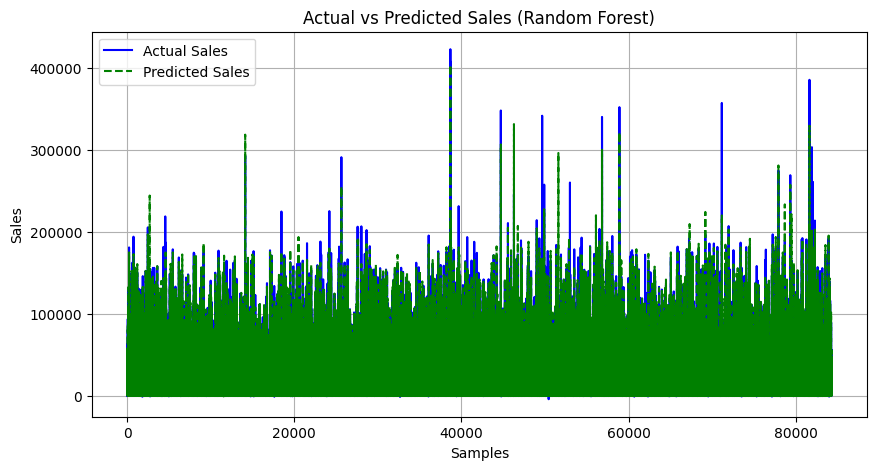

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(rf_pred, label='Predicted Sales', color='green', linestyle='--')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


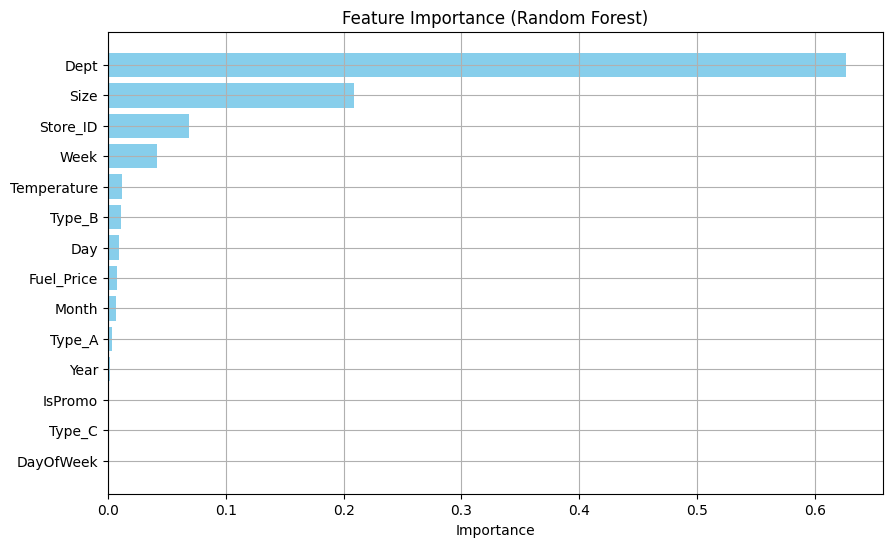

In [28]:
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Model Evaluation Report (Random Forest)")
print(f"✅ R² Score       : {r2:.4f}")
print(f"📉 RMSE (Error)   : {rmse:.2f}")
print(f"📉 MAE (Error)    : {mae:.2f}")


🔍 Model Evaluation Report (Random Forest)
✅ R² Score       : 0.0901
📉 RMSE (Error)   : 21782.24
📉 MAE (Error)    : 14578.65


In [29]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"🔍 XGBoost Model Evaluation:")
print(f"✅ R² Score       : {r2:.4f}")
print(f"📉 RMSE (Error)   : {mse**0.5:.2f}")
print(f"📉 MAE (Error)    : {mae:.2f}")

🔍 XGBoost Model Evaluation:
✅ R² Score       : 0.9075
📉 RMSE (Error)   : 6945.10
📉 MAE (Error)    : 3972.33


In [31]:
comparison_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.09, 0.964, 0.0866, 0.9035],
    'RMSE': [21824.98,
             7152.62,
             21824.98,
             7094.16],
    'MAE': [14564.77,
            4954.30,
            14564.77,
            4019.50]
}


model_comparison_df = pd.DataFrame(comparison_data)
model_comparison_df


,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.0900,21824.98,14564.77
1,Decision Tree,0.9640,7152.62,4954.30
2,Random Forest,0.0866,21824.98,14564.77
3,XGBoost,0.9035,7094.16,4019.50


## Final Model Comparison

| Model             | R² Score | RMSE     | MAE     |
|------------------|----------|----------|---------|
| Linear Regression| 0.0900   | 21824.98 | 14564.77|
| Decision Tree    | 0.9640   | 7152.62  | 4954.30 |
| Random Forest    | 0.0866   | 21824.98 | 14564.77|
| XGBoost ✅        | 0.9035   | 7094.16  | 4019.50 |

### Best Model: XGBoost  
The XGBoost Regressor gave the best performance with an **R² Score of 0.90**, making it our final selected model.


# Conclusion

This project demonstrates how machine learning can be used for retail sales prediction.  
By testing multiple models and comparing performance, we found that **XGBoost** offered the best results.



---



In [32]:
# Save cleaned dataset to CSV
merged_df.to_csv('cleaned_retail_data.csv', index=False)


In [33]:
!pip uninstall streamlit -y
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [35]:
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [67]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle

# Load model
with open("xgboost_model.pkl", "rb") as file:
    model = pickle.load(file)

# Page config
st.set_page_config(page_title="Retail Sales Prediction", layout="centered")
st.title("🛍️ Retail Sales Predictor")
st.write("Enter store and date details below to predict weekly sales.")

# Inputs
store_id = st.number_input("Store ID", min_value=1, max_value=45, value=1)
dept = st.number_input("Department", min_value=1, max_value=99, value=1)
year = st.number_input("Year", min_value=2010, max_value=2025, value=2012)
month = st.number_input("Month", min_value=1, max_value=12, value=1)
week = st.number_input("Week", min_value=1, max_value=52, value=1)
day = st.number_input("Day", min_value=1, max_value=31, value=1)
day_of_week = st.selectbox("Day of Week", [0, 1, 2, 3, 4, 5, 6])  # 0 = Monday
temperature = st.number_input("Temperature (°F)", value=70.0)
fuel_price = st.number_input("Fuel Price (USD)", value=3.0)
is_promo = st.checkbox("Promotion Active?", value=False)
size = st.number_input("Store Size (sqft)", value=150000)

# Store Type one-hot encoding
store_type = st.selectbox("Store Type", ['A', 'B', 'C'])
type_a = 1 if store_type == 'A' else 0
type_b = 1 if store_type == 'B' else 0
type_c = 1 if store_type == 'C' else 0

# Convert boolean to int
is_promo = int(is_promo)

# Final Input DataFrame
input_df = pd.DataFrame({
    "Store_ID": [store_id],
    "Dept": [dept],
    "Year": [year],
    "Month": [month],
    "Week": [week],
    "Day": [day],
    "DayOfWeek": [day_of_week],
    "Temperature": [temperature],
    "Fuel_Price": [fuel_price],
    "IsPromo": [is_promo],
    "Size": [size],
    "Type_A": [type_a],
    "Type_B": [type_b],
    "Type_C": [type_c]
})

# Predict
if st.button("Predict Weekly Sales"):
    try:
        prediction = model.predict(input_df)[0]
        st.success(f"📈 Predicted Weekly Sales: **${prediction:,.2f}**")
    except Exception as e:
        st.error(f"❌ Prediction failed: {e}")


Overwriting app.py


In [68]:
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦
changed 22 packages in 826ms
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [69]:
!streamlit run app.py & npx localtunnel --port 8501





⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.191.138:8501

⠴⠦⠧⠇⠏⠋your url is: https://open-icons-thank.loca.lt
  Stopping...
^C


In [70]:
!pip install pyngrok



In [71]:
from pyngrok import ngrok
from google.colab import userdata

NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
!rm -rf ~/.ngrok2


In [72]:
 !ngrok config add-authtoken 30S7SiB7GjyYjvVK6sAHyUlIKv0_2Un9FNVrAoKvYnHX9dzof




Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [73]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Your app URL:", public_url)


Your app URL: NgrokTunnel: "https://529ef358eb8f.ngrok-free.app" -> "http://localhost:8501"


In [74]:
!streamlit run app.py &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.191.138:8501

  Stopping...
